# Sector Demeaning Using Price History

In [2]:
import numpy as np
import pandas as pd
import pickle 
import h5py

In [12]:
f = pd.read_hdf('1-rets.h5')

In [13]:
f

,A,AABA,AAL,AAMRQ,AAP,AAPL,ABBV,ABC,ABI,ABKFQ,...,XRX,XTO,XYL,YNR,YRCW,YUM,ZBH,ZBRA,ZION,ZTS
1996-01-02,NaN,NaN,NaN,NaN,NaN,0.007843,NaN,NaN,NaN,NaN,...,-0.003650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,-0.000915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04,NaN,NaN,NaN,NaN,NaN,-0.017508,NaN,NaN,NaN,NaN,...,-0.021082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05,NaN,NaN,NaN,NaN,NaN,0.085150,NaN,NaN,NaN,NaN,...,-0.011236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-08,NaN,NaN,NaN,NaN,NaN,0.010948,NaN,NaN,NaN,NaN,...,-0.001894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,-0.001044,NaN,-0.015702,NaN,0.003065,-0.002331,-0.007309,0.004584,NaN,NaN,...,NaN,NaN,-0.001669,NaN,NaN,0.007611,-0.002509,-0.002733,-0.009971,-0.002911
2021-08-03,0.005161,NaN,-0.005483,NaN,0.012646,0.012644,0.006929,0.007985,NaN,NaN,...,NaN,NaN,0.018227,NaN,NaN,0.007780,-0.057052,-0.007677,0.021499,0.009846
2021-08-04,0.002665,NaN,-0.025063,NaN,-0.026602,-0.002782,-0.010065,0.014874,NaN,NaN,...,NaN,NaN,-0.009927,NaN,NaN,0.000750,-0.035652,0.024253,-0.009670,0.003381
2021-08-05,0.004991,NaN,0.075064,NaN,-0.015882,0.000749,0.000348,-0.029152,NaN,NaN,...,NaN,NaN,0.006790,NaN,NaN,0.000899,0.013088,0.016464,0.017040,-0.004639


In [31]:
temp = f.iloc[6100:6500,:].fillna(0).T
temp.head()

,2020-03-18,2020-03-19,2020-03-20,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-30,2020-03-31,...,2021-07-26,2021-07-27,2021-07-28,2021-07-29,2021-07-30,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06
A,-0.022288,-0.045158,0.010645,-0.046494,0.057283,0.029851,0.068406,-0.038117,0.027428,-0.014449,...,-0.013525,-0.001997,0.010070,0.007989,0.003668,-0.001044,0.005161,0.002665,0.004991,0.004257
AABA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAL,-0.252246,-0.116738,0.008746,-0.012524,0.358049,0.105603,0.017544,-0.103448,-0.127493,-0.004898,...,0.041509,-0.028080,0.007922,-0.021267,-0.037317,-0.015702,-0.005483,-0.025063,0.075064,0.005261
AAMRQ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAP,-0.114813,-0.028478,-0.127254,0.046248,0.100382,0.046191,0.074693,-0.015651,0.009414,-0.032953,...,-0.004001,0.005979,-0.014487,0.005371,-0.006233,0.003065,0.012646,-0.026602,-0.015882,-0.003005


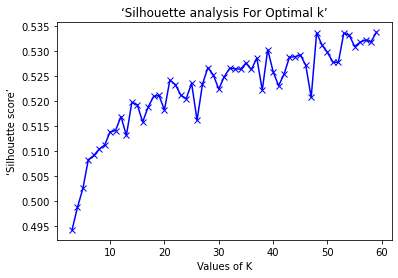

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(3,60))
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(temp)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(temp, cluster_labels))
    
plt.plot(range_n_clusters, silhouette_avg,'bx-')
    
plt.xlabel('Values of K') 
plt.ylabel('‘Silhouette score’') 
plt.title('‘Silhouette analysis For Optimal k’')
plt.show()

In [40]:
np.linspace(1,20,21)

array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
        9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
       18.1 , 19.05, 20.  ])

In [44]:
kmeans.labels_

array([10,  1, 37, ..., 27, 11, 10], dtype=int32)